# Building your first text classifier with Python


In this notebook I want to go a step further and apply some machine learning algorithms to text data in order to be able to classify it according to a given set of categories. I will use some basic NLP and machine learning concepts.


We’ll first use a public dataset from the BBC comprised of 2225 articles, each labeled under one of 5 categories: business, entertainment, politics, sport or tech.




In [1]:
import pandas as pd

In [2]:
bbc_data = pd.read_csv("bbc-text.csv")

In [3]:
bbc_data = bbc_data[['category', 'text']]

In [4]:
bbc_data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


<AxesSubplot:>

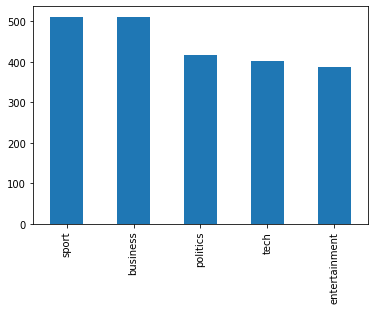

In [5]:
bbc_data['category'].value_counts().plot.bar()

As we can see it is a quite balanced dataset. With this sort of data, imbalanced in the dataset wouldn't be that problematic, but read this article if you are interestd in when imbalanced data can become a problem: https://medium.com/analytics-vidhya/what-is-balance-and-imbalance-dataset-89e8d7f46bc5

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn import svm, tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import (
    train_test_split, StratifiedShuffleSplit,
    cross_val_score)
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Baseline Classifier
Before we do anything with the data, lets split the data into train and test sets and run a multinomial naive bayes on the data. Naive Bayes is a popular algorithm, especially for NLP tasks. Check out this article where it's explained: https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vector = CountVectorizer()

#fit training data
training_data = count_vector.fit_transform(X_train)

#transform test data
testing_data = count_vector.transform(X_test)

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)


In [8]:
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))



accuracy: 0.9730337078651685


Wow - thats pretty good. But maybe we were lucky and got an "easy" 20% test set. Let's use cross validation to exclude that possibility

In [9]:
X_whole = count_vector.fit_transform(bbc_data['text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(naive_bayes, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.9755056179775281

It seems like even without any preprocessing we can get very good results. It seems like the features (words) in each category are similar enough within the category and distinct enough from other categories. Out of curiostiry lets create some word clouds to visualise it

In [10]:
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split())
        
      

In [11]:
sport_df = bbc_data[bbc_data['category'] == 'sport']
tech_df = bbc_data[bbc_data['category'] == 'tech']
pol_df = bbc_data[bbc_data['category'] == 'politics']

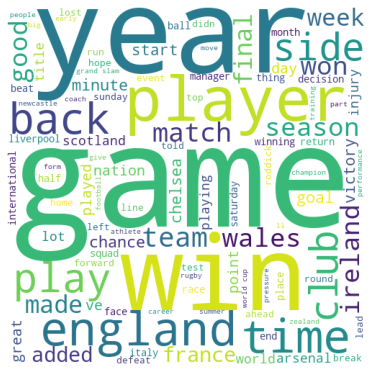

In [12]:
from wordcloud import WordCloud

bbc_words = '' 

for t in sport_df["text"]: 

    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

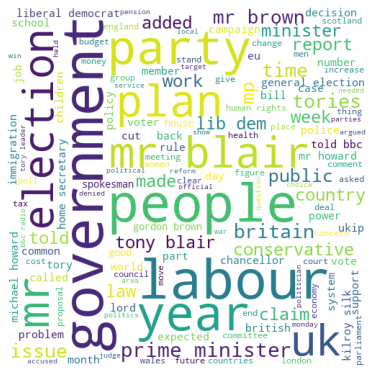

In [13]:
bbc_words = '' 

for t in pol_df["text"]: 
      
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

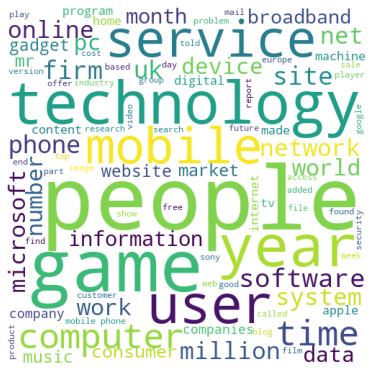

In [14]:
bbc_words = '' 

for t in tech_df["text"]: 

    
    tokens = t.split() 
      
      
    bbc_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 500, height = 500, 
                background_color ='white', 
                min_font_size = 10,
                stopwords=stop_words).generate(bbc_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Well yea, we can see that it is quite easy to distinguish political from tech news articles.
That's why it's usefull to always train a classifier with the raw data first. I have seen countless blog posts where people jump right in and do a lot of fancy preprocessing to get 95% of accuracy and when you train the classifier without preprocessing, its the same 95%

But let's still look at some other classifiers and compare their performance

## Decision Tree Classifier


In [15]:
DTC = DecisionTreeClassifier(random_state=10, criterion="entropy")
DTC.fit(training_data,y_train)# predict the labels on validation dataset
predictions_DTC = DTC.predict(testing_data)# Use accuracy_score function to get the accuracy
print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC, y_test)*100)

DTC Accuracy Score ->  77.75280898876404


In [16]:
X_whole = count_vector.fit_transform(bbc_data['text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(DTC, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.7898876404494383

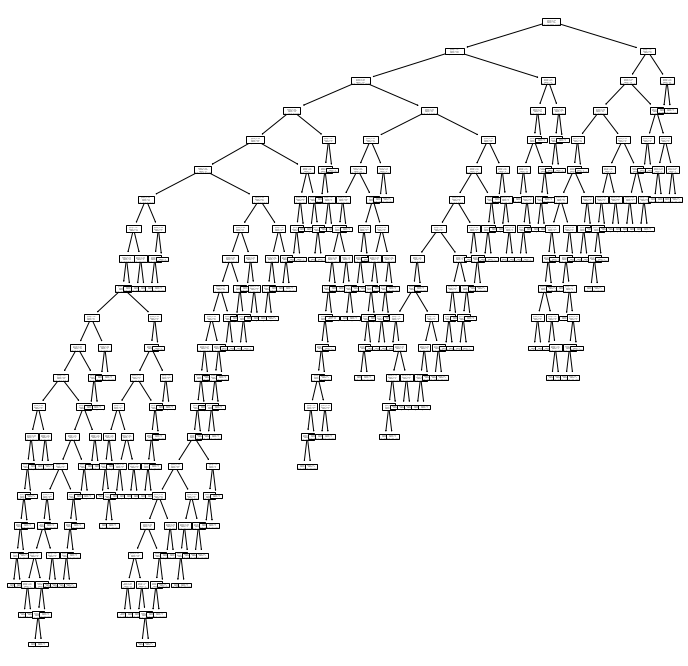

In [17]:

fig, ax = plt.subplots(figsize=(12, 12))  # change size in case it is not readable 
tree.plot_tree(DTC, ax=ax)
plt.show()

In [162]:
for i in range(3,30):

    print(i)
    DTC_2 = DecisionTreeClassifier(random_state=10, criterion="entropy", max_depth=i)
    DTC_2.fit(training_data,y_train)# predict the labels on validation dataset
    predictions_DTC_2 = DTC_2.predict(testing_data)# Use accuracy_score function to get the accuracy
    print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC_2, y_test)*100)

3
DTC Accuracy Score ->  52.58426966292134
4
DTC Accuracy Score ->  63.82022471910113
5
DTC Accuracy Score ->  67.86516853932584
6
DTC Accuracy Score ->  67.64044943820224
7
DTC Accuracy Score ->  72.58426966292136
8
DTC Accuracy Score ->  74.8314606741573
9
DTC Accuracy Score ->  74.8314606741573
10
DTC Accuracy Score ->  75.95505617977528
11
DTC Accuracy Score ->  75.95505617977528
12
DTC Accuracy Score ->  78.42696629213484
13
DTC Accuracy Score ->  78.65168539325843
14
DTC Accuracy Score ->  78.42696629213484
15
DTC Accuracy Score ->  80.4494382022472
16
DTC Accuracy Score ->  78.65168539325843
17
DTC Accuracy Score ->  79.32584269662921
18
DTC Accuracy Score ->  80.67415730337079
19
DTC Accuracy Score ->  79.7752808988764
20
DTC Accuracy Score ->  81.79775280898876
21
DTC Accuracy Score ->  77.75280898876404
22
DTC Accuracy Score ->  77.75280898876404
23
DTC Accuracy Score ->  77.75280898876404
24
DTC Accuracy Score ->  77.75280898876404
25
DTC Accuracy Score ->  77.75280898876404

You can see that accurace plateaus after 20 splits and that in fact 15 are enough

### Preprocess Data

In [22]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk import  word_tokenize
def preprocess(raw_text):
    
    #regular expression keeping only letters - more on them later
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = word_tokenize(letters_only_text.lower())
    

    cleaned_words = []
    lemmatizer = PorterStemmer() #play around with lemmatisers and stemmers
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #if using a lemmatiser, use lemmatize() instead of stem()
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [23]:
bbc_data['prep_text'] = bbc_data['text'].apply(preprocess)

In [24]:
bbc_data.head()

,category,text,prep_text
0,tech,tv future in the hands of viewers with home th...,tv futur hand viewer home theatr system plasma...
1,business,worldcom boss left books alone former worldc...,worldcom boss left book worldcom boss berni eb...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wari farrel gambl leicest rush make bid ...
3,sport,yeading face newcastle in fa cup premiership s...,yead face newcastl fa cup premiership side new...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelv raid box offic ocean twelv crime c...


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['prep_text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

#instantiate countvectorizer 
count_vectorizer = CountVectorizer()

#fit training data
training_data = count_vectorizer.fit_transform(X_train)

#transform test data
testing_data = count_vectorizer.transform(X_test)

In [28]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

predictions = naive_bayes.predict(testing_data)
print("NB Accuracy Score -> ",accuracy_score(predictions, y_test)*100)

NB Accuracy Score ->  97.52808988764045


In [29]:
for i in range(3,50):

    print(i)
    DTC_2 = DecisionTreeClassifier(random_state=10, criterion="entropy", max_depth=i)
    DTC_2.fit(training_data,y_train)# predict the labels on validation dataset
    predictions_DTC_2 = DTC_2.predict(testing_data)# Use accuracy_score function to get the accuracy
    print("DTC Accuracy Score -> ",accuracy_score(predictions_DTC_2, y_test)*100)

3
DTC Accuracy Score ->  49.66292134831461
4
DTC Accuracy Score ->  60.0
5
DTC Accuracy Score ->  65.3932584269663
6
DTC Accuracy Score ->  71.01123595505618
7
DTC Accuracy Score ->  73.93258426966293
8
DTC Accuracy Score ->  75.28089887640449
9
DTC Accuracy Score ->  77.75280898876404
10
DTC Accuracy Score ->  78.87640449438203
11
DTC Accuracy Score ->  79.7752808988764
12
DTC Accuracy Score ->  80.2247191011236
13
DTC Accuracy Score ->  82.02247191011236
14
DTC Accuracy Score ->  80.4494382022472
15
DTC Accuracy Score ->  81.34831460674158
16
DTC Accuracy Score ->  81.34831460674158
17
DTC Accuracy Score ->  83.14606741573034
18
DTC Accuracy Score ->  83.37078651685394
19
DTC Accuracy Score ->  82.47191011235955
20
DTC Accuracy Score ->  83.59550561797752
21
DTC Accuracy Score ->  84.71910112359551
22
DTC Accuracy Score ->  84.04494382022472
23
DTC Accuracy Score ->  84.49438202247191
24
DTC Accuracy Score ->  83.82022471910112
25
DTC Accuracy Score ->  84.49438202247191
26
DTC Accur

aha, our decision tree classifier got better with the preprocessed data

## KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier


KNN =KNeighborsClassifier(n_neighbors=4)
KNN.fit(training_data,y_train)# predict the labels on validation dataset
predictionsKNN = KNN.predict(testing_data)# Use accuracy_score function to get the accuracy
print("KNN Accuracy Score -> ",accuracy_score(predictionsKNN, y_test)*100)

KNN Accuracy Score ->  61.12359550561798


In [36]:
X_whole = count_vectorizer.fit_transform(bbc_data['prep_text'])
le = LabelEncoder()
y_enc = le.fit_transform(bbc_data['category'])
scores = cross_val_score(KNN, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.6080898876404495

In [33]:
for i in range (2,30):
    KNN =KNeighborsClassifier(n_neighbors=i)
    KNN.fit(training_data,y_train)# predict the labels on validation dataset
    predictionsKNN = KNN.predict(testing_data)# Use accuracy_score function to get the accuracy
    print("KNN Accuracy Score for ", i," neighbours -> ",accuracy_score(predictionsKNN, y_test)*100)

KNN Accuracy Score for  2  neighbours ->  62.92134831460674
KNN Accuracy Score for  3  neighbours ->  60.449438202247194
KNN Accuracy Score for  4  neighbours ->  61.12359550561798
KNN Accuracy Score for  5  neighbours ->  56.17977528089888
KNN Accuracy Score for  6  neighbours ->  54.157303370786515
KNN Accuracy Score for  7  neighbours ->  51.91011235955057
KNN Accuracy Score for  8  neighbours ->  51.01123595505618
KNN Accuracy Score for  9  neighbours ->  49.21348314606742
KNN Accuracy Score for  10  neighbours ->  48.53932584269663
KNN Accuracy Score for  11  neighbours ->  47.86516853932584
KNN Accuracy Score for  12  neighbours ->  46.96629213483146
KNN Accuracy Score for  13  neighbours ->  46.29213483146067
KNN Accuracy Score for  14  neighbours ->  45.61797752808989
KNN Accuracy Score for  15  neighbours ->  43.59550561797752
KNN Accuracy Score for  16  neighbours ->  41.79775280898876
KNN Accuracy Score for  17  neighbours ->  40.67415730337079
KNN Accuracy Score for  18  ne

## Support Vector Machine

In [50]:
SVM = svm.SVC(kernel="linear")   #(kernel="poly", degree=3, coef0=1, C=5) (kernel="linear")
SVM.fit(training_data,y_train)# predict the labels on validation dataset
predictions_SVM = SVM.predict(testing_data)# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  95.28089887640449


In [52]:
scores = cross_val_score(SVM, X_whole, y_enc, cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=100))
scores.mean()

0.9525842696629214

## (Vanilla) Neural Network

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    bbc_data['prep_text'],
    bbc_data['category'],
    test_size=0.2,
    random_state=50,
)

In [55]:

max_words = 1000
#keras vectorizer
tokenize = keras.preprocessing.text.Tokenizer(num_words=max_words)

In [56]:
tokenize.fit_on_texts(X_train) # fit tokenizer to our training text data
X_train = tokenize.texts_to_matrix(X_train)
X_test = tokenize.texts_to_matrix(X_test)


In [58]:
#X_train[0]

In [59]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)


In [62]:
#num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train)#, num_classes)
y_test = keras.utils.to_categorical(y_test)#, num_classes)

In [63]:
print('x_train shape:', X_train.shape)
print('x_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1780, 1000)
x_test shape: (445, 1000)
y_train shape: (1780, 5)
y_test shape: (445, 5)


In [64]:
y_train[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [65]:
# This model trains very quickly and 2 epochs are already more than enough
# Training for more epochs will likely lead to overfitting on this dataset
# You can try tweaking these hyperparamaters when using this model with your own data
batch_size = 50
epochs = 2 

In [67]:
model = Sequential()
model.add(layers.Dense(512, input_shape=(max_words,)))
model.add(layers.Activation('relu'))
model.add(layers.Dense(5))   #number of classes
model.add(layers.Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
_________________________________________________________________
activation_2 (Activation)    (None, 5)                 0         
Total params: 515,077
Trainable params: 515,077
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/2
33/33 [==============================] - 0s 7ms/step - loss: 0.5559 - accuracy: 0.8733 - val_loss: 0.1453 - val_accuracy: 0.9719
Epoch 2/2
33/33 [==============================] - 0s 4ms/step - loss: 0.0641 - accuracy: 0.9906 - val_loss: 0.1088 - val_accuracy: 0.9551
